In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data collection and Processing

In [51]:
data = pd.read_csv("/Users/abalde/Documents/Capstone/car data.csv")
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
data.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [53]:
#Checking the format of the data 
data.shape

(301, 9)

In [54]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
#Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [56]:
#Checking the number of missing values 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
#Replacing missing values 
#data = data.apply(lambda x: x.fillna(x.mean()),axis=0)
#data = data.drop('New_Price', 1)

In [57]:
#Checking the distrubition of categorical data 
print(data.Fuel_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [61]:
#Change values from textextual to numerical
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
data.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)

In [62]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


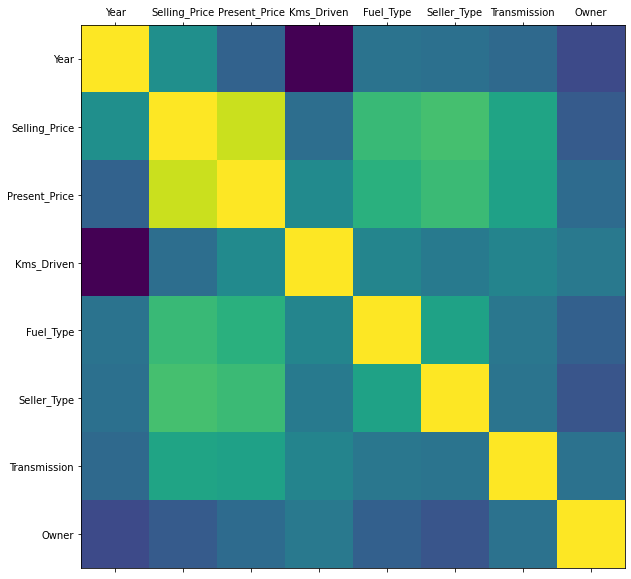

In [63]:
def plot_cor(data, size=10):
    corr = data.corr()
    fig, ax = plt.subplots(figsize =(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_cor(data)

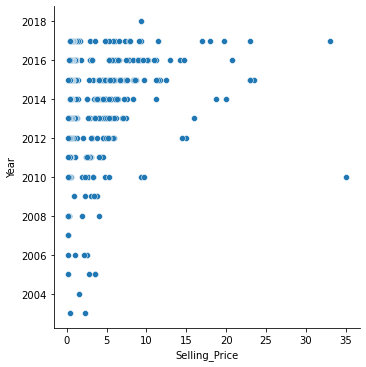

In [67]:
sns.relplot(x='Selling_Price', y='Year' ,data=data)

In [69]:
#Spliting, Training and Testing data
X = data.drop(['Car_Name', 'Selling_Price'],axis=1)
Y = data['Selling_Price']

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [95]:
#linear regression
lin_reg_m = LinearRegression()

In [96]:
lin_reg_m.fit(X_train,Y_train)

LinearRegression()

In [97]:
#Evaluate model/Prediction on training data 
training_prediction = lin_reg_m.predict(X_train)

In [98]:
# R square error value 
error_score = metrics.r2_score(Y_train, training_prediction)
print(error_score)

0.87994516604937


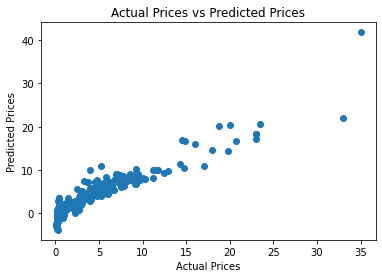

In [99]:
#visualize the actual prices and predicted price 
plt.scatter(Y_train, training_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [100]:
test_prediction = lin_reg_m.predict(X_test)

In [103]:
error_score2 = metrics.r2_score(Y_test, test_prediction)
print('Accuracy: ', error_score2)

Accuracy:  0.836576671502687


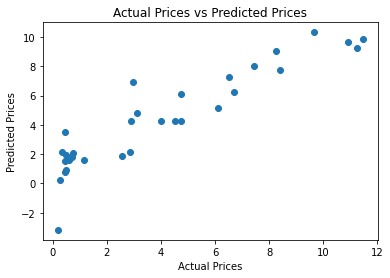

In [102]:
#visualize the actual prices and predicted price 
plt.scatter(Y_test, test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()